Mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracting the zip

In [1]:
import os,zipfile,cv2
from google.colab.patches import cv2_imshow
z = zipfile.ZipFile('/content/drive/MyDrive/mini project/self-built-masked-face-recognition-dataset.zip')#self
z.extractall('.')
z = zipfile.ZipFile('/content/drive/MyDrive/mini project/Real-World-Masked-Face-Dataset-master.zip')
z.extractall('.')

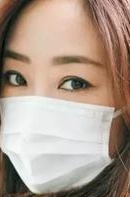

In [2]:
cv2_imshow(cv2.imread('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aidai/'+os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aidai')[0]))

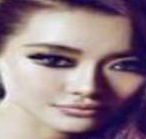

In [3]:
cv2_imshow(cv2.imread('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/'+os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai')[0]))

Exploratory Data Analysis

In [22]:
import numpy as np
x = []
y = []
for i in os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset'):
        image_path = '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/'+i
        for j in os.listdir(image_path):
            image = cv2.imread(image_path+'/'+j)
            x.append(cv2.resize(image,(28,28)))
            y.append(0)
for i in os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset'):
        image_path = '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/'+i
        for j in os.listdir(image_path):
            image = cv2.imread(image_path+'/'+j)
            x.append(cv2.resize(image,(28,28)))
            y.append(1)
x = np.array(x).reshape(-1,28*28*3)
y = np.array(y).reshape(-1,1)

In [5]:
len(x)

92671

In [8]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

Train-test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=1)

Classifiers :

(1) SVM 

In [7]:
from sklearn.svm import SVC

In [8]:
model_svc=SVC()
model_svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
from sklearn.metrics import f1_score,accuracy_score

In [13]:
y_pred=model_svc.predict(X_test)

In [18]:
f1=f1_score(y_true=y_test,y_pred=y_pred)
f1


0.8722680913064594

In [21]:
acc=accuracy_score(y_test,y_pred)
acc

0.994324067679558

(2) Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model_logR=LogisticRegression()

In [24]:
model_logR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred=model_logR.predict(X_test)

In [26]:
f1=f1_score(y_true=y_test,y_pred=y_pred)
f1


0.8464037122969836

In [27]:
acc=accuracy_score(y_test,y_pred)
acc

0.992856526243094

(3) Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
percep=Perceptron(penalty='l1',tol=1e-3,alpha=0.0001, random_state=0)
percep.fit(x_train,y_train)

In [ ]:
f1=f1_score(y_true=y_test,y_pred=yper_pred)
f1
# 0.8666666666666667

In [ ]:
from sklearn.metrics import accuracy_score
yper_pred=percep.predict(x_test)
print("for alpha=0.0001:",accuracy_score(yper_pred,y_test))
#0.9937845303867403

(4) Multi Layer Perceptron (MLP)

In [28]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

In [30]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [31]:
y_pred=mlp.predict(X_test)

In [32]:
f1=f1_score(y_true=y_test,y_pred=y_pred)
f1


0.8252032520325203

In [33]:
acc=accuracy_score(y_test,y_pred)
acc

0.9907199585635359

(5) Random Forest :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

In [ ]:
y_pred=model_rf.predict(X_test)

In [ ]:
f1=f1_score(y_true=y_test,y_pred=y_pred)
f1
# 0.7273724629731212

In [ ]:
acc=accuracy_score(y_test,y_pred)
acc
# 0.9892739986187845